In [5]:
using BeamLib: IsotropicArray, steerphi, bartlett
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steerphi(pa, fc, Θ[1]).*s1 + steerphi(pa, fc, Θ[2]).*s2
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n

# Bartlett spectrum 
# Same as steering dsb_weights
# but using the capon function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P = bartlett.(Ref(pa), Ref(X), Ref(fc), deg2rad.(ϕaxis))

360-element Vector{ComplexF64}:
  8.45880725818082 - 8.463082046888059e-17im
 8.458583211168177 + 2.8373300862193714e-17im
 8.457909203384043 + 1.0225662980662182e-16im
 8.456779637329719 + 1.271057640649803e-16im
 8.455185192995001 - 4.339183360044535e-17im
 8.453112841663243 + 3.4578171234133636e-17im
 8.450545865385259 - 5.5198688717949596e-17im
 8.447463882267726 - 6.006429742988451e-17im
 8.443842877761696 - 9.041303794375287e-17im
 8.439655242175427 + 9.55471693348572e-17im
                   ⋮
 8.464918219085508 - 5.884012306286524e-17im
 8.461658145060504 + 2.720800851989841e-17im
 8.458775069510827 - 9.401165742016276e-18im
 8.456293748100778 - 5.1143518482969633e-17im
 8.454235100217044 + 4.0812035113724155e-17im
 8.452616222406304 - 4.4273088664002194e-18im
 8.451450399751062 + 3.005945891004631e-17im
 8.450747114954504 + 1.7472066240369673e-17im
 8.450512054956608 - 7.261786833867508e-17im

In [6]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(abs.(P)).indices]

2-element Vector{Float64}:
 10.779944289693589
 76.46239554317549

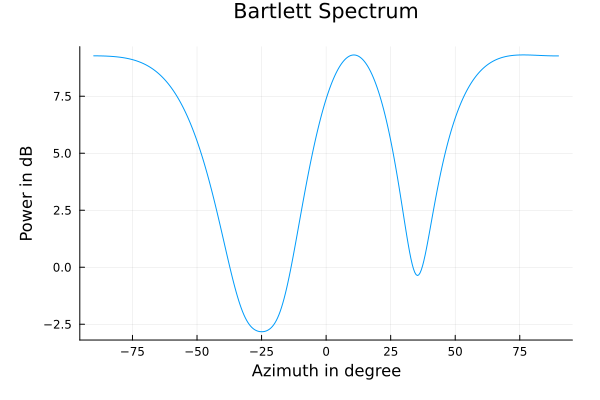

In [7]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(abs.(P)))
plot!(title="Bartlett Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")